In [1]:
#自動リロード
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
from scoring import ig_scoring

In [2]:
res_dir="res/1020ig_plus_oa_change_r/*.csv"
path_list=glob.glob(res_dir)[::-1]
#path_list=sorted(path_list)

cond_list=[]
for path in path_list:
    name=path
    rem_list=res_dir.split("/")
    rem_list.extend([
            "/",
            ".csv",
    ])
    for n in rem_list:
        name=name.replace(n,"")
    


    cond_list.append(name)
len(cond_list)

74

In [3]:
path_dict={c:path for c,path in zip(cond_list,path_list)}

df=None

for key,path in path_dict.items():
    temp_df=pd.read_csv(path)
    temp_df["condition"]=key

    if df is None:
        df=temp_df
    else:
        #結合
        df=pd.concat((df,temp_df))

cols=["Number of data","Epoch","r","FullLoRA"]
df[cols]=df["condition"].str.split("_",expand=True)

In [4]:
score_list=[]
for record in df.to_dict(orient="records"):
    record["problem"]=record["problem"].replace("You are a great scientist. Answer the following question:\n[Question] ","")
    record["problem"]=record["problem"].replace("\n[Answer]","").strip()
    score_list.append(ig_scoring(record))

df["score"]=score_list

In [5]:

cols1=["Number of data","Epoch","r","FullLoRA","score"]
cols2=["Number of data","Epoch","r","FullLoRA"]

mean_df=df[cols1].groupby(cols2)
mean_df=mean_df.mean().reset_index()
mean_df["Epoch"]=mean_df["Epoch"].astype(int)
mean_df["r"]=mean_df["r"].astype(int)
mean_df["Number of data"]=mean_df["Number of data"].astype(int)

In [6]:
mean_df=mean_df.sort_values(["Number of data","Epoch"],ascending=False)

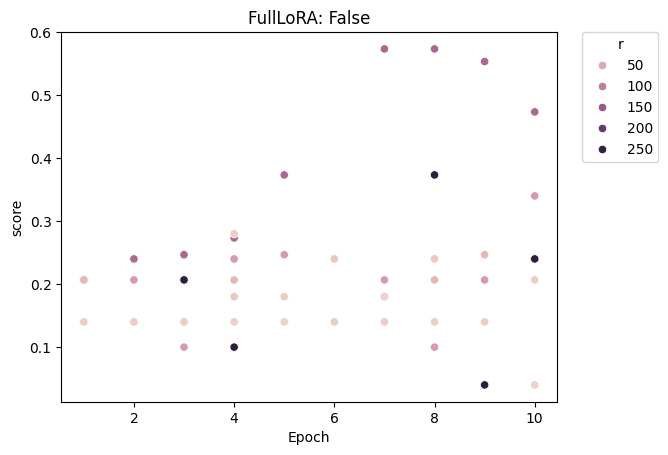

In [7]:
for lora in ["False"]:
  sel_df=mean_df[mean_df["FullLoRA"]==lora]
  plt.figure()
  sns.scatterplot(data=sel_df,
                  hue="r",
                  y="score",
                  x="Epoch",
                  )
  """
  sns.lineplot(data=sel_df,
                hue="r", 
                y="score",
                x="Epoch",
                legend=False
                )
  """
  #plt.xscale("log")
  #plt.xlabel("Number of irrelevant texts")
  plt.title(f"FullLoRA: {lora}")
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10,title="r")

<Axes: xlabel='Epoch', ylabel='score'>

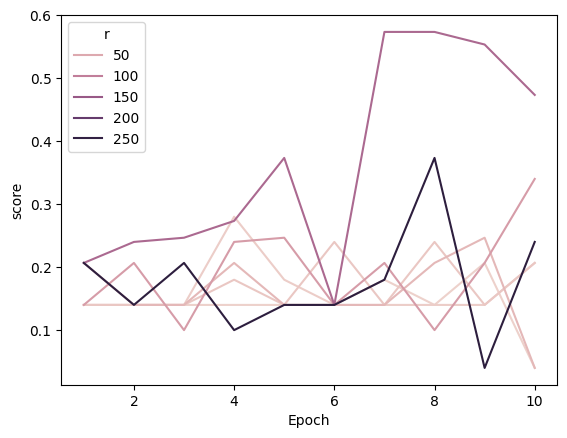

In [8]:
  sns.lineplot(data=sel_df,
                hue="r", 
                y="score",
                x="Epoch",
                #legend=False
                )

In [9]:
import numpy as np
np.logspace(1, 3.7, 20)

array([  10.        ,   13.87091988,   19.24024183,   26.68798528,
         37.01869056,   51.34832907,   71.22485585,   98.79542688,
        137.03834507,  190.08479047,  263.66508987,  365.72773364,
        507.29800907,  703.66900383,  976.05363731, 1353.87618002,
       1877.95080185, 2604.89051083, 3613.2227568 , 5011.87233627])

In [10]:
key[2]

'0'